In [1]:
#Cell for Google Colab
!git clone https://github.com/cnu1439/quickNAT_pytorch.git
%cd quickNAT_pytorch
!pip install -r requirements.txt

Cloning into 'quickNAT_pytorch'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 651 (delta 56), reused 55 (delta 26), pack-reused 556
Receiving objects: 100% (651/651), 364.94 MiB | 35.14 MiB/s, done.
Resolving deltas: 100% (344/344), done.
/content/quickNAT_pytorch
     |████████████████████████████████| 194kB 3.4MB/s 


In [ ]:
%load_ext autoreload
%autoreload 2

In [19]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import utils.data_utils as du
from matplotlib import cm
%matplotlib inline

In [20]:
def show_slice(data, mask=None):
  fig, ax = plt.subplots(figsize=(8,8))
  ax.imshow(data, cmap='gray')
  ax.set_axis_off()
  ax.axes.get_xaxis().set_visible(False)
  ax.axes.get_yaxis().set_visible(False)
  
  if not mask is None:
    c_map = cm.get_cmap('jet')
    mask = np.ma.masked_where( mask < 0.5, mask)
    c_map.set_bad(color='black', alpha=0.0)
    ax.imshow(mask , cmap=c_map, alpha=0.7)

Original data shape :  (256, 256, 180)
Converted data shape :  (256, 256, 256)


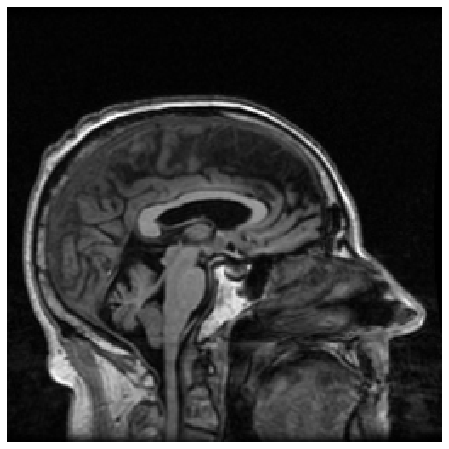

In [21]:
orig_file_path = 'datasets/ADNI/S22389_SCAN0_T1.nii.gz'
orig_data = nib.load(orig_file_path).get_fdata()
print("Original data shape : ", orig_data.shape)

#File path after running mri_convert
converted_file_path = 'datasets/ADNI/MRI_S22389_SCAN0_T1.nii.gz'
data = nib.load(converted_file_path).get_fdata()

print("Converted data shape : ", data.shape)
show_slice(data[125, :, :])

In [ ]:
from run import evaluate_bulk
from settings import Settings

In [8]:
settings_eval = Settings('settings_eval.ini')
evaluate_bulk(settings_eval['EVAL_BULK'])

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'quicknat.QuickNat' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Modu

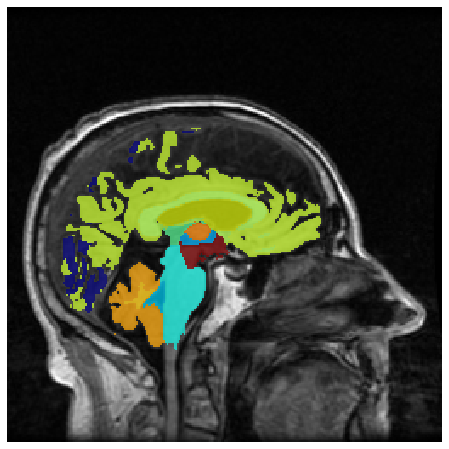

In [9]:
mask_file_path = 'adni_test_seg/two_view/MRI_S22389_SCAN0_T1.nii.gz.nii.gz'
mask = nib.load(mask_file_path).get_fdata()
show_slice(data[125, :, :], mask[125, :, :])

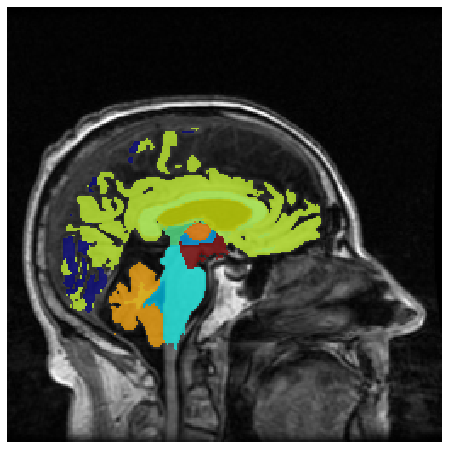

In [38]:
demo_mask_file = 'adni_test_seg/two_view/seg_result_2019-12-31_10_14_35.985575.mgz'
mask = nib.load(demo_mask_file).get_fdata()
mask = np.transpose(mask, (1, 2, 0))
mask = mask[:,::-1, :]
show_slice(data[125, :, :], mask[125, :, :])